
# Project: Investigate a Dataset - [TMDb Movie Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> In this project we will be analyzing data contains information about +10000 movies and try to answer some important question we will ask about this data set like what are the movies with high revenue? and What kinds of properties are associated with them?

### Dataset Description 

> This data set contains information about +10,000 movies collected from The Movie Database (TMDb), including: 
- User Ratings 
- Revenue
- Popularity
- Budget 
- Original Title
- Cast
- Director
- Runtime
- Genres
- Production Companies 
- Vote Count
- Vote Average
- Release Year


### Question(s) for Analysis

#### Q1: What kinds of properties are associated with the movies with high profit?  
#### Q2: What do people think of movies with high budget and high profits?


In [2]:
# importing packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, we will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. 


### General Properties

> exploring data in this section we will know: 
- types of data we dealing with.
- ovarall informations and statistics about data
- duplicates and null values in data 

In [3]:
# load dataset
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')

In [4]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# show some info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
# some useful statistics of the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


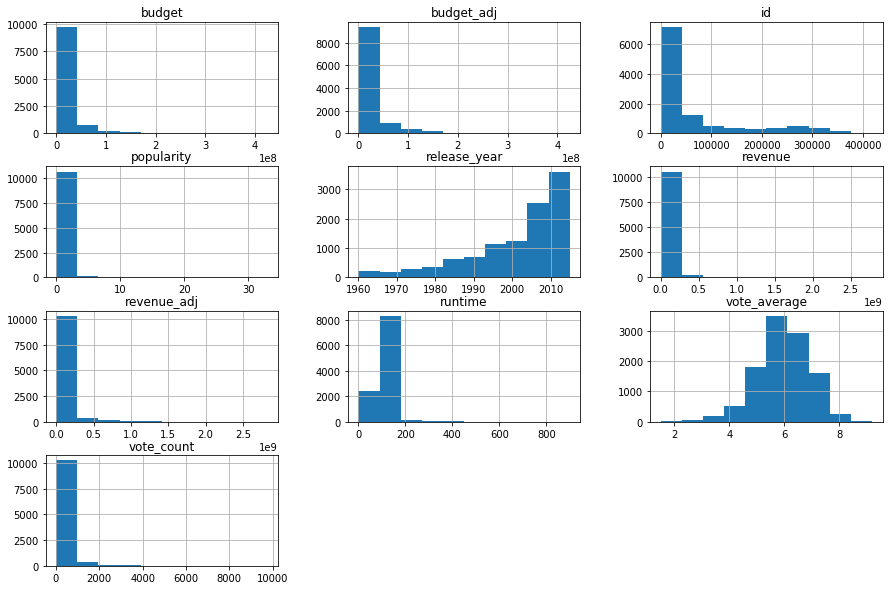

In [7]:
#visualizing the data to get a better understanding
df.hist(figsize=(15, 10));


### Data Cleaning

> First we need to drop some columns that we will not use.

In [8]:
# delete columns we do not need
columns_to_drop = ['id', 'imdb_id', 'homepage', 'keywords', 'tagline', 'overview', 'release_date', 'budget_adj', 'vote_count', 'revenue_adj']
df.drop(columns_to_drop, axis=1, inplace=True)
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015


In [9]:
#show some info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
vote_average            10866 non-null float64
release_year            10866 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 933.9+ KB


> Dealing with duplicates and null values.

In [10]:
# see if we have duplicated rows 
df.duplicated().sum()

1

In [11]:
# drop that duplicated row
df.drop_duplicates(inplace=True)
# check
df.duplicated().sum()

0

In [12]:
# we have null values in cast, genres and production companies. we will use .dropna to drop them.
df.dropna(inplace=True)

In [13]:
# view dimensions of dataset
df.shape

(9772, 11)

> We realize from the histograms above that there are a lot of values equal to zero in budget, revenue and runtime. that will negatively affect our analysis so we need to clean them up

In [14]:
# count of zero values in budget
df.query('budget == 0')['budget'].count()

4751

In [15]:
# count of zero values in revenue
df.query('revenue == 0')['revenue'].count()

5022

In [16]:
# count of zero values in runtime
df.query('runtime == 0')['runtime'].count()

13

In [17]:
#replace 0 values with NAN and drop them 
df['budget'].replace(0, np.NAN, inplace=True)
df['revenue'].replace(0, np.NAN, inplace=True)
df['runtime'].replace(0, np.NAN, inplace=True)
df.dropna(inplace=True)
# check
df.query('budget == 0')['budget'].count()

0

In [18]:
# check
df.query('revenue == 0')['revenue'].count()

0

In [19]:
# check
df.query('runtime == 0')['runtime'].count()

0

In [20]:
# creat column for Profit 
df['profit'] = df['revenue'] - df['budget']

In [21]:
df.dtypes

popularity              float64
budget                  float64
revenue                 float64
original_title           object
cast                     object
director                 object
runtime                 float64
genres                   object
production_companies     object
vote_average            float64
release_year              int64
profit                  float64
dtype: object

In [22]:
def convert_to_int(column_name):
    """change type of column to int

    Parameters:
    column_name -- column name (str)
    """
    df[column_name] = df[column_name].astype(np.int64)
    print('{} type is: {}'.format(column_name, df.dtypes[column_name]))

In [23]:
# convert profit, budget and revenue columns to int
convert_to_int('budget')
convert_to_int('profit')
convert_to_int('revenue')

budget type is: int64
profit type is: int64
revenue type is: int64


In [24]:
# view dimensions of dataset
df.shape

(3805, 12)

<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1 (What kinds of properties are associated with the movies with high profit? )

> first we will figure out which movie had highest profit and which one had lowest profit. 
just to know cause i am curious :D

In [25]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,228436354
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,1868178225
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015,1316249360


In [26]:
# finding max profit 
df.profit.max()

2544505847

In [27]:
# use query to find which movie
df.query('profit == 2544505847')['original_title']

1386    Avatar
Name: original_title, dtype: object

The Movie with the highest profit is Avatar.

In [28]:
# finding min profit 
df.profit.min()

-413912431

In [29]:
# use query to find which movie
df.query('profit == -413912431')['original_title']

2244    The Warrior's Way
Name: original_title, dtype: object

The Movie with the lowest profit is The Warrior's Way.

> Now let's find if high budget associated with higher profit or not

In [30]:
# View the min, 25%, 50%, 75%, max budget values with Pandas describe
df.describe()['budget']

count    3.805000e+03
mean     3.760800e+07
std      4.232179e+07
min      1.000000e+00
25%      1.000000e+07
50%      2.500000e+07
75%      5.000000e+07
max      4.250000e+08
Name: budget, dtype: float64

In [31]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [1.000000e+00, 1.000000e+07, 2.500000e+07, 5.000000e+07, 4.250000e+08]

In [32]:
# Labels for the four budget level groups
bin_names = ['Low', 'Medium','High', 'Very High']

In [33]:
# Creates budget_levels column
df['budget_levels'] = pd.cut(df['budget'], bin_edges, labels=bin_names)

In [34]:
# Find the mean profit of each budget level with groupby
df.groupby('budget_levels', as_index=False)['profit'].mean()

,budget_levels,profit
0,Low,2.276719e+07
1,Medium,3.982933e+07
2,High,5.833065e+07
3,Very High,1.755475e+08


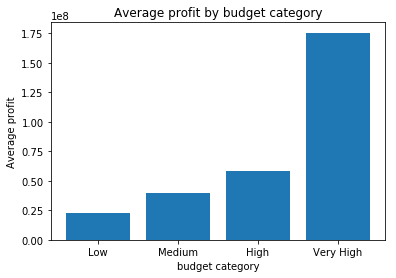

In [35]:
# Create a bar chart 
locations = [1, 2, 3, 4]
heights = [2.276719e+07, 3.982933e+07, 5.833065e+07, 1.755475e+08]
labels = bin_names
plt.bar(locations, heights, tick_label=labels)
plt.title('Average profit by budget category')
plt.xlabel('budget category')
plt.ylabel('Average profit');

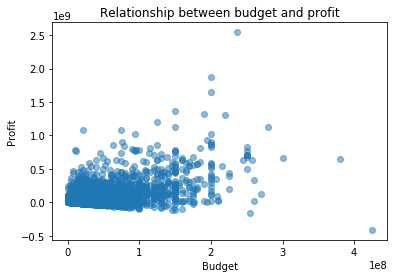

In [36]:
# Create a scatter plot 
plt.scatter(df['budget'], df['profit'], alpha=0.5)
plt.title('Relationship between budget and profit')
plt.xlabel('Budget')
plt.ylabel('Profit');

We can see in the bar chart that the average profits slightly increase with the increase in the budget except for very high budgets we notice a large increase in average profits, but despite that there are some films that do not achieve high profits even with a large budget, as we can see in scatter plot. 

> Now let's find if high runtime associated with higher profit or not

In [37]:
# View the min, 25%, 50%, 75%, max runtime values with Pandas describe
df.describe()['runtime']

count    3805.000000
mean      109.351117
std        19.845678
min        15.000000
25%        96.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

we will use min and max but 25%, 50% and 75% will set to 60, 150 and 210 To be more realistic.

In [38]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [3, 60, 150, 210, 877]

In [39]:
# Labels for the four runtime level groups
bin_names = ['short', 'Medium','long', 'Very long']

In [40]:
# Creates runtime_levels column
df['runtime_levels'] = pd.cut(df['runtime'], bin_edges, labels=bin_names)

In [41]:
# Find the mean profit of each runtime level with groupby
df.groupby('runtime_levels', as_index=False)['profit'].mean()

,runtime_levels,profit
0,short,8.999998e+06
1,Medium,6.688172e+07
2,long,2.011710e+08
3,Very long,-2.410376e+06


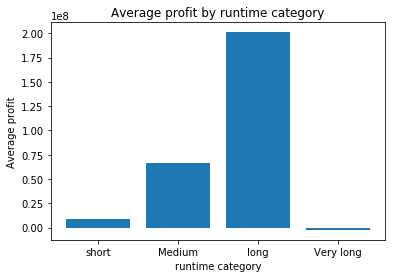

In [42]:
# Create a bar chart 
locations = [1, 2, 3, 4]
heights = [8.999998e+06, 6.688172e+07, 2.011710e+08, -2.410376e+06]
labels = bin_names
plt.bar(locations, heights, tick_label=labels)
plt.title('Average profit by runtime category')
plt.xlabel('runtime category')
plt.ylabel('Average profit');

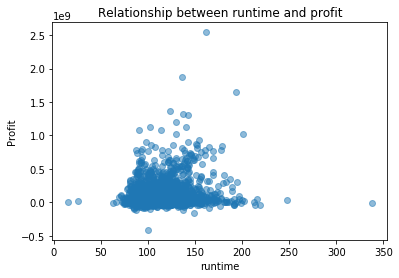

In [43]:
# Create a scatter plot 
plt.scatter(df['runtime'], df['profit'], alpha=0.5)
plt.title('Relationship between runtime and profit')
plt.xlabel('runtime')
plt.ylabel('Profit');

We can see in the bar chart that the average profits are very high for movies of 2.5 hours to 3.5 hours and relatively high for movies of 1 hours to 2.5 hours, and we see this also in the scatter chart.

>  Now let's find if high popularity associated with higher profit or not

In [44]:
# View the min, 25%, 50%, 75%, max popularity values with Pandas describe
df.describe()['popularity']

count    3805.000000
mean        1.203784
std         1.480569
min         0.010335
25%         0.470651
50%         0.810805
75%         1.387163
max        32.985763
Name: popularity, dtype: float64

we will use min and max but 25%, 50% and 75% will set to 2, 5 and 10 To be more realistic.

In [45]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [0.000188, 2, 5, 10, 32.985763]

In [46]:
# Labels for the four popularity level groups
bin_names = ['Low', 'Medium','High', 'Very High']

In [47]:
# Creates popularity_levels column
df['popularity_levels'] = pd.cut(df['popularity'], bin_edges, labels=bin_names)

In [48]:
# Find the mean profit of each popularity level with groupby
df.groupby('popularity_levels', as_index=False)['profit'].mean()

,popularity_levels,profit
0,Low,4.015622e+07
1,Medium,2.151536e+08
2,High,4.771456e+08
3,Very High,6.732337e+08


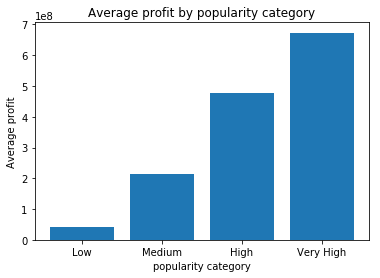

In [49]:
# Create a bar chart 
locations = [1, 2, 3, 4]
heights = [4.015622e+07, 2.151536e+08, 4.771456e+08, 6.732337e+08]
labels = bin_names
plt.bar(locations, heights, tick_label=labels)
plt.title('Average profit by popularity category')
plt.xlabel('popularity category')
plt.ylabel('Average profit');

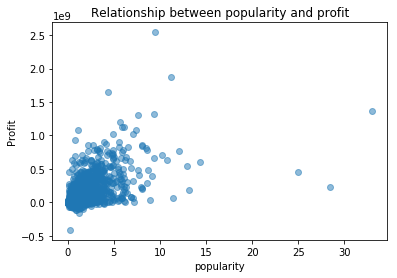

In [50]:
# Create a scatter plot 
plt.scatter(df['popularity'], df['profit'], alpha=0.5)
plt.title('Relationship between popularity and profit')
plt.xlabel('popularity')
plt.ylabel('Profit');

As expected, highly popular films got higher average profits, but it is not necessary for hugely popular films to achieve highest profits, as shown by the scatter plot.

> Now let's find which genres associated with higher profit

In [51]:
df.describe()['profit']

count    3.805000e+03
mean     7.136540e+07
std      1.513764e+08
min     -4.139124e+08
25%     -1.173477e+06
50%      2.047434e+07
75%      8.347333e+07
max      2.544506e+09
Name: profit, dtype: float64

we will find genres associted with movies which made profit of more than 8.347333e+07

In [52]:
# make Dataframe which has data of movies which made profit of more than 8.347333e+07
high_profit = df[df['profit'] >= 8.347333e+07]
high_profit.shape

(952, 15)

In [53]:
# count the number of each genres
genres_count = pd.Series(high_profit['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
genres_count

Comedy             348
Action             343
Drama              317
Adventure          296
Thriller           267
Family             178
Science Fiction    161
Fantasy            154
Romance            154
Crime              126
Animation          104
Mystery             77
Horror              75
Music               38
War                 35
History             21
Western             12
Documentary          3
dtype: int64

Text(0,0.5,'Number of Movies')

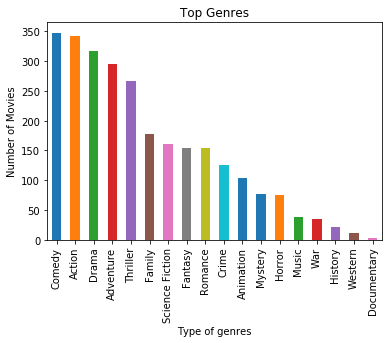

In [54]:
# Create a bar chart 
chart = genres_count.plot.bar()
chart.set(title = 'Top Genres')
chart.set_xlabel('Type of genres')
chart.set_ylabel('Number of Movies')

We can see on the chart that comedy is the most frequent in the list of highest-profit movies, followed by action, drama and the rest. 

### Research Question 2  (What do people think of movies with high budget and high profits?)

In [55]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year,profit,budget_levels,runtime_levels,popularity_levels
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1363528810,Very High,Medium,Very High
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,228436354,Very High,Medium,Very High
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,185238201,Very High,Medium,Very High
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,1868178225,Very High,Medium,Very High
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015,1316249360,Very High,Medium,High


> First let's see What do people think of movies with high budget.

In [56]:
# Find the mean profit of each budget level with groupby
df.groupby('budget_levels', as_index=False)['vote_average'].mean()

,budget_levels,vote_average
0,Low,6.253539
1,Medium,6.151382
2,High,6.088565
3,Very High,6.181096


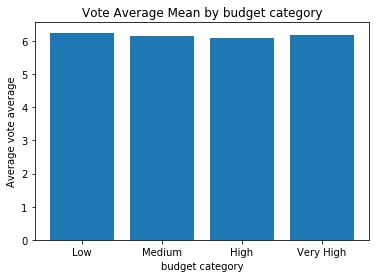

In [57]:
# Create a bar chart 
locations = [1, 2, 3, 4]
heights = [6.253539, 6.151382, 6.088565, 6.181096]
labels = ['Low', 'Medium','High', 'Very High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Vote Average Mean by budget category')
plt.xlabel('budget category')
plt.ylabel('Average vote average');

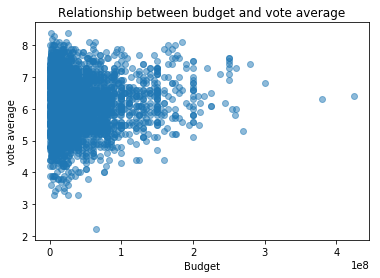

In [58]:
# Create a scatter plot 
plt.scatter(df['budget'], df['vote_average'], alpha=0.5)
plt.title('Relationship between budget and vote average')
plt.xlabel('Budget')
plt.ylabel('vote average');

As we can see, the average ratings do not change almost with the change in the budget.

> Let's see the distribution of movies in the rating categories for very high budget movies.

In [59]:
# View the min, 25%, 50%, 75%, max vote_average values with Pandas describe
df.describe()['vote_average']

count    3805.000000
mean        6.170565
std         0.792437
min         2.200000
25%         5.700000
50%         6.200000
75%         6.700000
max         8.400000
Name: vote_average, dtype: float64

In [60]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [2.2, 5.7, 6.2, 6.7, 8.4]

In [61]:
# Labels for the four vote_average level groups
bin_names = ['Low', 'Medium','High', 'Very High']

In [62]:
# Creates vote_average_levels column
df['vote_average_levels'] = pd.cut(df['vote_average'], bin_edges, labels=bin_names)

In [63]:
# selecting movies with very high budget level
df_high_budget = df.query('budget_levels == "Very High"')

In [64]:
# Find the value counts of each vote average level
df_high_budget.vote_average_levels.value_counts()

Low          251
Medium       236
High         204
Very High    202
Name: vote_average_levels, dtype: int64

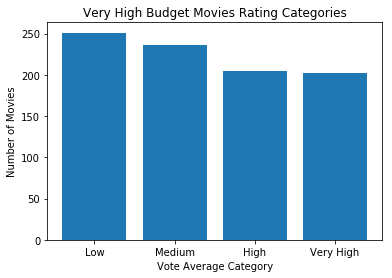

In [65]:
# Create a bar chart 
locations = [1, 2, 3, 4]
heights = [251, 236, 204, 202]
labels = bin_names
plt.bar(locations, heights, tick_label=labels)
plt.title('Very High Budget Movies Rating Categories')
plt.xlabel('Vote Average Category')
plt.ylabel('Number of Movies');

It appears here that the largest percentage of films with a very high budget get a low rating, but not by a large difference

> Now let's see What do people think of movies with both high budget high profits.

In [66]:
high_profit.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year,profit,budget_levels,runtime_levels,popularity_levels
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1363528810,Very High,Medium,Very High
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,228436354,Very High,Medium,Very High
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,185238201,Very High,Medium,Very High
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,1868178225,Very High,Medium,Very High
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015,1316249360,Very High,Medium,High


In [67]:
high_profit.groupby('budget_levels', as_index=False)['vote_average'].mean()

,budget_levels,vote_average
0,Low,6.570667
1,Medium,6.568153
2,High,6.427632
3,Very High,6.400407


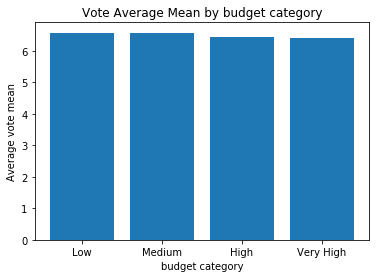

In [68]:
# Create a bar chart 
locations = [1, 2, 3, 4]
heights = [6.570667, 6.568153, 6.427632, 6.400407]
labels = ['Low', 'Medium','High', 'Very High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Vote Average Mean by budget category')
plt.xlabel('budget category')
plt.ylabel('Average vote mean');

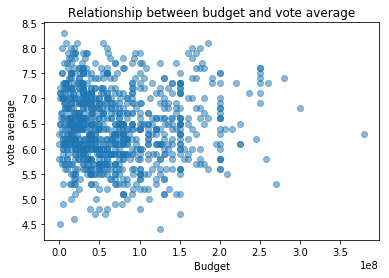

In [69]:
# Create a scatter plot 
plt.scatter(high_profit['budget'], high_profit['vote_average'], alpha=0.5)
plt.title('Relationship between budget and vote average')
plt.xlabel('Budget')
plt.ylabel('vote average');

We note here that for movies with high profits, the budget does not affect the average ratings much. We also note that the average ratings are higher for high-profit films.

> So let's explore the relationship between profit and vote average.

In [70]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year,profit,budget_levels,runtime_levels,popularity_levels,vote_average_levels
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1363528810,Very High,Medium,Very High,High
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,228436354,Very High,Medium,Very High,Very High
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,185238201,Very High,Medium,Very High,High
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,1868178225,Very High,Medium,Very High,Very High
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015,1316249360,Very High,Medium,High,Very High


In [71]:
# View the min, 25%, 50%, 75%, max profit values with Pandas describe
df.describe()['profit']

count    3.805000e+03
mean     7.136540e+07
std      1.513764e+08
min     -4.139124e+08
25%     -1.173477e+06
50%      2.047434e+07
75%      8.347333e+07
max      2.544506e+09
Name: profit, dtype: float64

In [72]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [-4.139124e+08, -1.173477e+06, 2.047434e+07, 8.347333e+07, 2.544506e+09]

In [73]:
# Labels for the four profit level groups
bin_names = ['Low', 'Medium','High', 'Very High']

In [74]:
# Creates profit levels column
df['profit_levels'] = pd.cut(df['profit'], bin_edges, labels=bin_names)

In [75]:
# Find the mean profit of each budget level with groupby
df.groupby('profit_levels', as_index=False)['vote_average'].mean()

,profit_levels,vote_average
0,Low,5.842061
1,Medium,6.127234
2,High,6.264526
3,Very High,6.448004


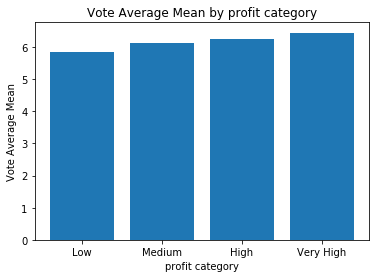

In [76]:
# Create a bar chart 
locations = [1, 2, 3, 4]
heights = [5.842061, 6.127234, 6.264526, 6.448004]
labels = bin_names
plt.bar(locations, heights, tick_label=labels)
plt.title('Vote Average Mean by profit category')
plt.xlabel('profit category')
plt.ylabel('Vote Average Mean');

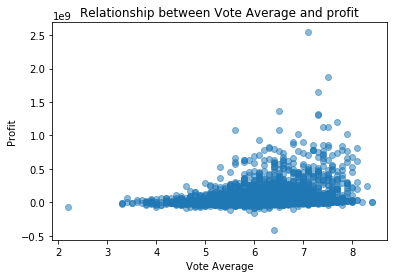

In [77]:
# Create a scatter plot 
plt.scatter(df['vote_average'], df['profit'], alpha=0.5)
plt.title('Relationship between Vote Average and profit')
plt.xlabel('Vote Average')
plt.ylabel('Profit');

We can see that he higher the profits, the higher the average ratings

<a id='conclusions'></a>
## Conclusions
For the first question, we explored 4 variables that may be related to achieving high profits, and they are:
> 1- Budget: We have found that the budget is closely related to the achievement of profits, as films with high budgets achieve much higher average profits than others.

> 2- Runtime: It was found that films with a duration of between two and a half hours and three and a half hours make very huge profits compared to the rest, followed by films with a duration of between one and two hours and a half.

> 3- Popularity: As expected, the relationship is positive. Movies that get high popularity achieve high profits, so it is very important to pay attention to promoting the movie well.

> 4- Genre: We found that Drama, Comedy, Thriller, Action and Adventure are the top 5 most profitable genres.

As for the second question, the results were very interesting, as it appeared that:
> The average ratings of people for films does not differ much by budget and Slightly increased with the increase in profits . 

> But we noticed that films with both large budgets and high profits have higher average ratings.

### Limitations
> In the data cleaning section, we lost a lot of our data cause there was a lot of null and zero values. That has affected the overall analysis as we had to work with smaller sample size.


In [78]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0